Importing Libraries

In [11]:
import pandas as pd
import numpy as np

Selecting Dataset

Loading Dataset

In [12]:
dataset=pd.read_csv('salary.csv')

Viewing dataset

In [13]:
print(dataset.shape)
print(dataset.head(5))
print(dataset.tail(5))


(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K
       age  education.num  capital.gain  hours.per.week income
32556   22             10             0              40  <=50K
32557   27             12             0              38  <=50K
32558   40              9             0              40   >50K
32559   58              9             0              40  <=50K
32560   22              9             0              20  <=50K


Mapping salary to binary values

In [14]:
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


Segregating dataset

In [15]:
X = dataset.iloc[:,:-1].values

In [19]:
Y=dataset.iloc[:, -1].values

Splitting Dataset

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.25, random_state=0)


Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Finding the best K value using iteration

Text(0, 0.5, 'Mean Error')

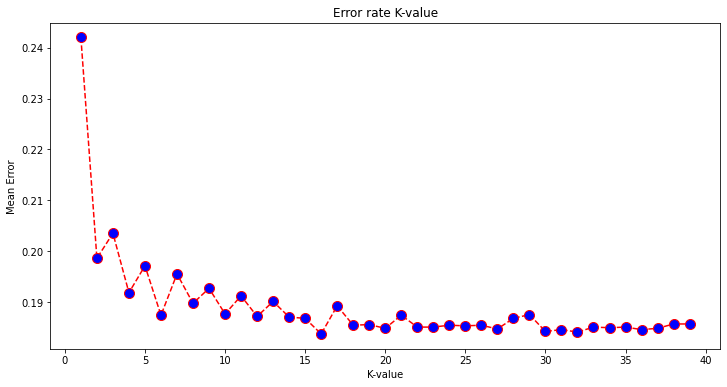

In [27]:
error=[]
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

for i in range(1,40):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  predat_i= model.predict(X_test)
  error.append(np.mean(predat_i != y_test))


plt.figure(figsize=(12,6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error rate K-value')
plt.xlabel('K-value')
plt.ylabel('Mean Error')


Training our dataset

In [28]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=16, metric='minkowski', p=2)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=16)

In [ ]:
Predicting

In [29]:
age=int(input("Enter employee's age: "))
edu=int(input("Enter employee's education: "))
capital_gain=int(input("Enter employee's capital gain: "))
work_hours=int(input("Enter employee's work hours: "))
newEmployee=[[age,edu,capital_gain,work_hours]]
result= model.predict(sc.transform(newEmployee))
print(result)

if(result==1):
  print("Employee may get salary above 50k.")

else:
  print("Employee may not gey salary above 50k.")
  

Enter employee's age: 34
Enter employee's education: 2
Enter employee's capital gain: 2
Enter employee's work hours: 22
[0]
Employee may not gey salary above 50k.


Predicting for all datsets

In [30]:
y_pred=model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Confusin Matrix

In [31]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm=confusion_matrix(y_test,y_pred)
print("Confusin matrix for the predicted output is:")
print(cm)
print("Accuracy of the model made is: {0}%".format(accuracy_score(y_test,y_pred)*100))

Confusin matrix for the predicted output is:
[[5882  311]
 [1185  763]]
Accuracy of the model made is: 81.62387913032796%
